In [14]:
import random
import numpy as np
np.random.seed(seed=1337)
max_weight = 3
n_items = 16
max_value = (2**n_items) 
weights =  np.random.rand(n_items)
values = np.random.rand(n_items)

In [15]:
from numba import njit,prange
@njit()
def encodeNumber(number,bits=n_items):
    return np.array([bool(number & (1<<(bits-1-x))) for x in prange(bits)])

In [16]:
@njit()
def scoreFunction(mask, weights=weights,values=values,max_weight=max_weight,max_value=max_value):
    final_weight = 0
    score = 0 
    for i in prange(weights.size):
        if mask[i]:
            final_weight+=weights[i]
            score+=values[i]
    return 0 if final_weight > max_weight else score

In [17]:
@njit(parallel=True)
def getData():
    return np.array([scoreFunction(encodeNumber(x)) for x in prange(2**n_items)])
%time data = getData()

Wall time: 650 ms


### Check for useless results

In [18]:
np.count_nonzero(data==0)

48559

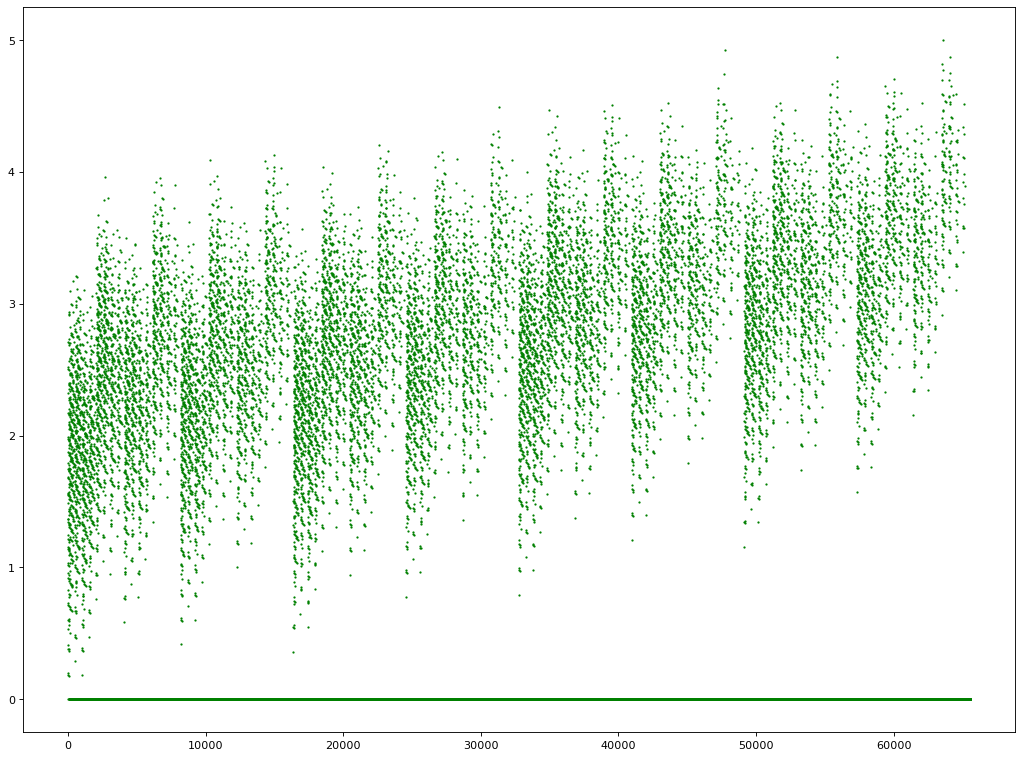

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 12), dpi=80) 
plt.scatter(range(len(data)), data,color="g",s=1)
# plt.ylabel('scores')
plt.show()

### Greedy algorithm

In [20]:
# Values to weight ratios with indexes for sort
VW_ratios = values / weights
indexes = np.flip(np.argsort(VW_ratios))

In [21]:
# Sort by indexes
VW_ratios = np.take_along_axis(VW_ratios, indexes, axis=0) # stosunki wartości/wagi
VW_weights = np.take_along_axis(weights, indexes, axis=0) # posrotowane wagi
VW_values = np.take_along_axis(values, indexes, axis=0) # posortowane wartości

In [22]:
# Calculate greedy results
greedy_score = 0
greedy_weight = 0
for i in range(len(VW_ratios)):
    if(greedy_weight + VW_weights[i]) <= max_weight:
        greedy_score += VW_values[i]
        greedy_weight += VW_weights[i]
print("Weight: ",greedy_weight)
print("Score: ",greedy_score)

Weight:  2.7709860150069376
Score:  4.871708441930054
